# Random forest Regression

### importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### importing dataset and defining x and y

In [4]:
df=pd.read_csv('train.csv')
x=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values

### Imputing for missing values

In [6]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy='mean')
x=si.fit_transform(x)

### splitting into training and test sets:

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


### fitting a random forest model based on hyperparameters by using gridsearchCv

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import time

scores = []
times = []
for n in [100,120,140,160,180,200,220,240,260,280,300]:
    start = time.time()
    model = RandomForestRegressor(n_estimators=n,max_depth=25, random_state=0,max_features='sqrt')
    model.fit(x_train, y_train)
    r2 = model.score(x_test, y_test)
    scores.append(r2)
    times.append(time.time() - start)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot([100,120,140,160,180,200,220,240,260,280,300], scores, marker='o')
plt.title("R² vs Number of Trees")
plt.xlabel("n_estimators")
plt.ylabel("R² Score")

plt.subplot(1,2,2)
plt.plot([100,120,140,160,180,200,220,240,260,280,300], times, marker='o', color='red')
plt.title("Time vs Number of Trees")
plt.xlabel("n_estimators")
plt.ylabel("Time (s)")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

param_grid = {
    'n_estimators': [10,50,100],
    'max_depth': [15,20, 25,30],
    'max_features': ['sqrt', 'log2',None]
}

rfr = RandomForestRegressor(random_state=0)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=cv, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train.ravel())  # Make sure y_train is 1D

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

### training the Random forest model

In [8]:
from sklearn.ensemble import RandomForestRegressor
rtr=RandomForestRegressor(n_estimators=100,max_depth=25,max_features='sqrt',random_state=0)
rtr.fit(x_train,y_train.ravel())

,n_estimators,100
,criterion,'squared_error'
,max_depth,25
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### predicting Y values

In [9]:
y_pred=rtr.predict(x_test)


### plotting actual vs predicted values:

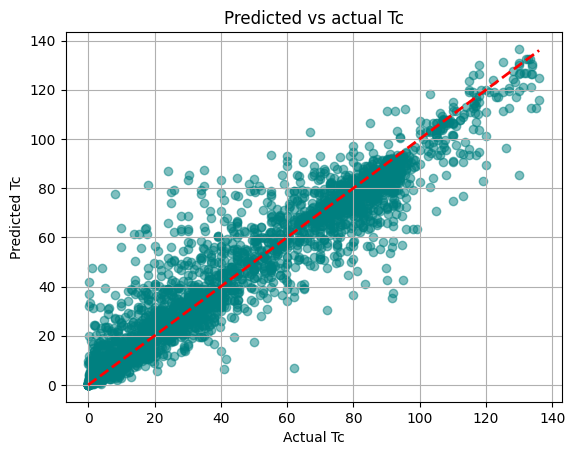

In [ ]:
plt.figure()
plt.scatter(y_test,y_pred,c='teal',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.grid(True)
plt.xlabel("Actual Tc")
plt.ylabel("Predicted Tc")
plt.title("Predicted vs actual Tc")
plt.show()

### R2 and RMSE values:

In [ ]:
from sklearn.metrics import r2_score, root_mean_squared_error
r2=r2_score(y_true=y_test,y_pred=y_pred)
print(r2)

rmse=root_mean_squared_error(y_true=y_test,y_pred=y_pred)
print(rmse)

0.925897042020284
9.287024674043753


### crossvalidation:

In [ ]:
from sklearn.model_selection import cross_val_score,KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestRegressor(n_estimators=100, max_depth=25 ,max_features='sqrt',random_state=0)
scores = cross_val_score(model, x, y.ravel(), cv=cv, scoring='r2')
print("R² scores for each fold:", scores)
print("Mean R² score:", scores.mean())

### Feature importances:

In [20]:
features_2letter = [
    "number_of_elements","mean_atomic_mass","wtd_mean_atomic_mass","gmean_atomic_mass","wtd_gmean_atomic_mass","entropy_atomic_mass",
    "wtd_entropy_atomic_mass","range_atomic_mass","wtd_range_atomic_mass","std_atomic_mass","wtd_std_atomic_mass","mean_fie","wtd_mean_fie",
    "gmean_fie","wtd_gmean_fie","entropy_fie","wtd_entropy_fie","range_fie","wtd_range_fie","std_fie","wtd_std_fie","mean_atomic_radius",
    "wtd_mean_atomic_radius","gmean_atomic_radius","wtd_gmean_atomic_radius","entropy_atomic_radius","wtd_entropy_atomic_radius",
    "range_atomic_radius","wtd_range_atomic_radius","std_atomic_radius","wtd_std_atomic_radius","mean_Density","wtd_mean_Density",
    "gmean_Density","wtd_gmean_Density","entropy_Density","wtd_entropy_Density","range_Density","wtd_range_Density","std_Density",
    "wtd_std_Density","mean_ElectronAffinity","wtd_mean_ElectronAffinity","gmean_ElectronAffinity","wtd_gmean_ElectronAffinity",
    "entropy_ElectronAffinity","wtd_entropy_ElectronAffinity","range_ElectronAffinity","wtd_range_ElectronAffinity","std_ElectronAffinity",
    "wtd_std_ElectronAffinity","mean_FusionHeat","wtd_mean_FusionHeat","gmean_FusionHeat","wtd_gmean_FusionHeat","entropy_FusionHeat",
    "wtd_entropy_FusionHeat","range_FusionHeat","wtd_range_FusionHeat","std_FusionHeat","wtd_std_FusionHeat","mean_ThermalConductivity",
    "wtd_mean_ThermalConductivity","gmean_ThermalConductivity","wtd_gmean_ThermalConductivity","entropy_ThermalConductivity",
    "wtd_entropy_ThermalConductivity","range_ThermalConductivity","wtd_range_ThermalConductivity","std_ThermalConductivity",
    "wtd_std_ThermalConductivity","mean_Valence","wtd_mean_Valence","gmean_Valence","wtd_gmean_Valence","entropy_Valence",
    "wtd_entropy_Valence","range_Valence","wtd_range_Valence","std_Valence","wtd_std_Valence","critical_temp"
]

l=[]
n_runs = 10
all_importances = []

for rs in range(n_runs):
    rf = RandomForestRegressor(n_estimators=100,max_depth=25,max_features='sqrt', random_state=rs)
    rf.fit(x_train, y_train)
    all_importances.append(rf.feature_importances_)

avg_importances = np.mean(all_importances, axis=0)
imp=[]
for name,score in zip(features_2letter,avg_importances):
    l.append([score,name])
    imp.append(score)
l.sort(reverse=True)
imp.sort(reverse=True)
for i in l:
    print(i)

d:\programming\pythonstuff\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\programming\pythonstuff\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\programming\pythonstuff\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\programming\pythonstuff\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

[np.float64(0.08151541978422441), 'range_ThermalConductivity']
[np.float64(0.06911958386201832), 'wtd_std_ThermalConductivity']
[np.float64(0.06019596787050809), 'range_atomic_radius']
[np.float64(0.05537411680754527), 'wtd_mean_Valence']
[np.float64(0.04920471682068083), 'wtd_entropy_Valence']
[np.float64(0.04504016322060987), 'std_ThermalConductivity']
[np.float64(0.043654522070425986), 'wtd_gmean_Valence']
[np.float64(0.04049880816954584), 'wtd_entropy_atomic_mass']
[np.float64(0.023108133881182), 'wtd_mean_ThermalConductivity']
[np.float64(0.02221494444522224), 'range_fie']
[np.float64(0.020240181964505197), 'entropy_Valence']
[np.float64(0.019561578182383882), 'mean_Valence']
[np.float64(0.019128207221309094), 'gmean_Density']
[np.float64(0.01762962600800313), 'wtd_std_ElectronAffinity']
[np.float64(0.016078898205262752), 'wtd_entropy_atomic_radius']
[np.float64(0.01573261662933632), 'gmean_Valence']
[np.float64(0.015630114098226167), 'wtd_entropy_FusionHeat']
[np.float64(0.015570

## PCA

In [10]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

### tuning HyperParameters:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

param_grid = {
    'n_estimators': [10,50,100],
    'max_depth': [15,20, 25,30],
    'max_features': ['sqrt', 'log2',None]
}

rfr = RandomForestRegressor(random_state=0)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=cv, scoring='r2', n_jobs=1)
grid_search.fit(x_train_pca, y_train.ravel())  # Make sure y_train is 1D

print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

### fitting random forest regression model:

In [11]:
from sklearn.ensemble import RandomForestRegressor
rfrp=RandomForestRegressor(n_estimators=100,max_depth=30,max_features='sqrt',random_state=0)
rfrp.fit(x_train_pca,y_train.ravel())

,n_estimators,100
,criterion,'squared_error'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### predicting y

In [12]:
y_pred_pca=rfrp.predict(x_test_pca)

### plotting actual vs predicted Tc:

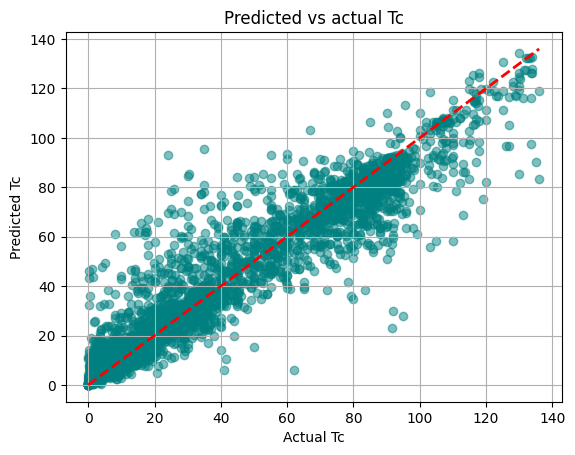

In [13]:

plt.figure()
plt.scatter(y_test,y_pred_pca,c='teal',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.grid(True)
plt.xlabel("Actual Tc")
plt.ylabel("Predicted Tc")
plt.title("Predicted vs actual Tc")
plt.show()

### R2 RMSE:


In [14]:
from sklearn.metrics import r2_score, root_mean_squared_error
r2_pca=r2_score(y_true=y_test,y_pred=y_pred_pca)
print(r2_pca)

rmse_pca=root_mean_squared_error(y_true=y_test,y_pred=y_pred_pca)
print(rmse_pca)

0.9136170663499911
10.02704125623079


In [ ]:
features_2letter = [
    "PC 1","PC 2","PC 3","PC 4","PC 5","PC 6","PC 7","PC 8","PC 9","PC 10","PC 11","PC 12","PC 13","PC 14","PC 15","PC 16","PC 17"
]

l=[]
n_runs = 10
all_importances = []

for rs in range(n_runs):
    rf = RandomForestRegressor(n_estimators=100,max_depth=25,max_features='sqrt', random_state=rs)
    rf.fit(x_train_pca, y_train)
    all_importances.append(rf.feature_importances_)

avg_importances = np.mean(all_importances, axis=0)
imp=[]
for name,score in zip(features_2letter,avg_importances):
    l.append([score,name])
    imp.append(score)
l.sort(reverse=True)
imp.sort(reverse=True)
for i in l:
    print(i)

### Plotting the first 5 most importatnt Principle components

### plotting 17 PCS

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(16, 20))  # 6x3 grid for 18 PCs
axes = axes.flatten()

for i in range(17):
    axes[i].plot(pca.components_[i], marker='o', color='crimson')
    axes[i].set_title(f'PC {i+1} Loadings')
    axes[i].set_xlabel('Original Feature Index')
    axes[i].set_ylabel('Weight')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(9, 2, figsize=(12, 18))  # 17 PCs = 9 rows, 2 cols
axs = axs.flatten()

for i in range(17):
    axs[i].scatter(x_train_pca[:, i], np.zeros_like(x_train_pca[:, i]), c='teal', alpha=0.5, s=10)
    axs[i].set_title(f"PC {i+1}")
    axs[i].set_yticks([])

# Hide the last subplot (18th) if unused
axs[-1].axis('off')

plt.tight_layout()
plt.show()


In [15]:
from sklearn.ensemble import RandomForestRegressor
rfr2=RandomForestRegressor(n_estimators=100,max_depth=25,max_features='sqrt',random_state=0)
rfr2.fit(x_train,y_train.ravel())

l=[]
features_2letter = [
    "number_of_elements","mean_atomic_mass","wtd_mean_atomic_mass","gmean_atomic_mass","wtd_gmean_atomic_mass","entropy_atomic_mass",
    "wtd_entropy_atomic_mass","range_atomic_mass","wtd_range_atomic_mass","std_atomic_mass","wtd_std_atomic_mass","mean_fie","wtd_mean_fie",
    "gmean_fie","wtd_gmean_fie","entropy_fie","wtd_entropy_fie","range_fie","wtd_range_fie","std_fie","wtd_std_fie","mean_atomic_radius",
    "wtd_mean_atomic_radius","gmean_atomic_radius","wtd_gmean_atomic_radius","entropy_atomic_radius","wtd_entropy_atomic_radius",
    "range_atomic_radius","wtd_range_atomic_radius","std_atomic_radius","wtd_std_atomic_radius","mean_Density","wtd_mean_Density",
    "gmean_Density","wtd_gmean_Density","entropy_Density","wtd_entropy_Density","range_Density","wtd_range_Density","std_Density",
    "wtd_std_Density","mean_ElectronAffinity","wtd_mean_ElectronAffinity","gmean_ElectronAffinity","wtd_gmean_ElectronAffinity",
    "entropy_ElectronAffinity","wtd_entropy_ElectronAffinity","range_ElectronAffinity","wtd_range_ElectronAffinity","std_ElectronAffinity",
    "wtd_std_ElectronAffinity","mean_FusionHeat","wtd_mean_FusionHeat","gmean_FusionHeat","wtd_gmean_FusionHeat","entropy_FusionHeat",
    "wtd_entropy_FusionHeat","range_FusionHeat","wtd_range_FusionHeat","std_FusionHeat","wtd_std_FusionHeat","mean_ThermalConductivity",
    "wtd_mean_ThermalConductivity","gmean_ThermalConductivity","wtd_gmean_ThermalConductivity","entropy_ThermalConductivity",
    "wtd_entropy_ThermalConductivity","range_ThermalConductivity","wtd_range_ThermalConductivity","std_ThermalConductivity",
    "wtd_std_ThermalConductivity","mean_Valence","wtd_mean_Valence","gmean_Valence","wtd_gmean_Valence","entropy_Valence",
    "wtd_entropy_Valence","range_Valence","wtd_range_Valence","std_Valence","wtd_std_Valence","critical_temp"
]

for i in zip(rfr2.feature_importances_,features_2letter):
    l.append(i)
l.sort(reverse=True)

for i in l:
    print(i)

(np.float64(0.08838489360349909), 'range_ThermalConductivity')
(np.float64(0.06692056663158716), 'wtd_std_ThermalConductivity')
(np.float64(0.05373031642332721), 'range_atomic_radius')
(np.float64(0.052412393713266565), 'std_ThermalConductivity')
(np.float64(0.049537455780944206), 'wtd_gmean_Valence')
(np.float64(0.04066793691292342), 'mean_Valence')
(np.float64(0.04023391758346181), 'wtd_mean_Valence')
(np.float64(0.034891769252967005), 'wtd_entropy_Valence')
(np.float64(0.034083702714245455), 'entropy_Valence')
(np.float64(0.03357881457469353), 'wtd_entropy_atomic_mass')
(np.float64(0.02689796016193386), 'wtd_mean_ThermalConductivity')
(np.float64(0.0268307679528849), 'gmean_Density')
(np.float64(0.020024877220828637), 'wtd_entropy_FusionHeat')
(np.float64(0.019746918937675176), 'range_fie')
(np.float64(0.019642390754610828), 'wtd_std_ElectronAffinity')
(np.float64(0.01797427498210945), 'wtd_gmean_ThermalConductivity')
(np.float64(0.01590993279935606), 'wtd_entropy_atomic_radius')
(n

<Axes: >

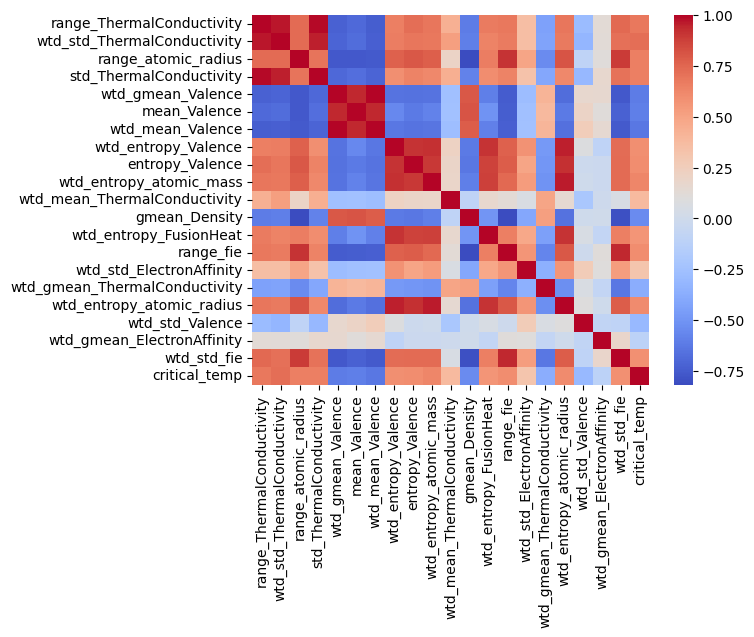

In [19]:
import seaborn as sns
sns.heatmap(df[[
    'range_ThermalConductivity',
    'wtd_std_ThermalConductivity',
    'range_atomic_radius',
    'std_ThermalConductivity',
    'wtd_gmean_Valence',
    'mean_Valence',
    'wtd_mean_Valence',
    'wtd_entropy_Valence',
    'entropy_Valence',
    'wtd_entropy_atomic_mass',
    'wtd_mean_ThermalConductivity',
    'gmean_Density',
    'wtd_entropy_FusionHeat',
    'range_fie',
    'wtd_std_ElectronAffinity',
    'wtd_gmean_ThermalConductivity',
    'wtd_entropy_atomic_radius',
    'wtd_std_Valence',
    'wtd_gmean_ElectronAffinity',
    'wtd_std_fie',
    'critical_temp'
]].corr(),cmap='coolwarm'
)

In [ ]:

n_runs = 10
all_importances = []

for rs in range(n_runs):
    rfr2 = RandomForestRegressor(n_estimators=100,max_depth=25,max_features='sqrt', random_state=rs)
    rfr2.fit(x_train, y_train)
    all_importances.append(rf.feature_importances_)

avg_importances = np.mean(all_importances, axis=0)
imp=[]
for name,score in zip(features_2letter,avg_importances):
    l.append([score,name])
    imp.append(score)
l.sort(reverse=True)
imp.sort(reverse=True)
for i in l:
    print(i)

In [22]:
reduced_df=df[[
 'range_ThermalConductivity',
 'wtd_std_ThermalConductivity',
 'range_atomic_radius',
 'std_ThermalConductivity',
 'wtd_gmean_Valence',
 'mean_Valence',
 'wtd_mean_Valence',
 'wtd_entropy_Valence',
 'entropy_Valence',
 'wtd_entropy_atomic_mass',
 'wtd_mean_ThermalConductivity',
 'gmean_Density',
 'wtd_entropy_FusionHeat',
 'range_fie',
 'wtd_std_ElectronAffinity',
 'wtd_gmean_ThermalConductivity',
 'wtd_entropy_atomic_radius',
 'wtd_std_Valence',
 'wtd_gmean_ElectronAffinity',
 'wtd_std_fie',
 'std_atomic_mass',
 'wtd_range_Valence',
 'mean_ThermalConductivity',
 'wtd_entropy_fie',
 'wtd_entropy_ThermalConductivity',
 'gmean_FusionHeat',
 'wtd_range_ElectronAffinity',
 'wtd_range_ThermalConductivity',
 'wtd_mean_ElectronAffinity',
 'entropy_fie',
 'std_ElectronAffinity',
 'wtd_gmean_atomic_radius',
 'range_ElectronAffinity',
 'entropy_atomic_mass',
 'wtd_std_atomic_mass',
 'wtd_std_atomic_radius',
 'std_Density',
 'wtd_range_fie',
 'wtd_std_FusionHeat',
 'wtd_range_FusionHeat',
 'gmean_ElectronAffinity',
 'gmean_Valence',
 'wtd_entropy_Density',
 'wtd_mean_fie',
 'std_atomic_radius',
 'wtd_mean_atomic_mass',
 'std_fie',
 'wtd_gmean_Density',
 'wtd_gmean_FusionHeat'
]]



In [27]:
from sklearn.model_selection import train_test_split
x_train_red,x_test_red,y_train_red,y_test_red=train_test_split(reduced_df,y,test_size=0.2,random_state=0)

In [67]:
from sklearn.ensemble import RandomForestRegressor
rfrpred=RandomForestRegressor(n_estimators=100,max_depth=25,max_features='sqrt',random_state=0)
rfrpred.fit(x_train_red,y_train_red.ravel())

,n_estimators,100
,criterion,'squared_error'
,max_depth,25
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [68]:
y_pred_Red=rfrpred.predict(x_test_red)

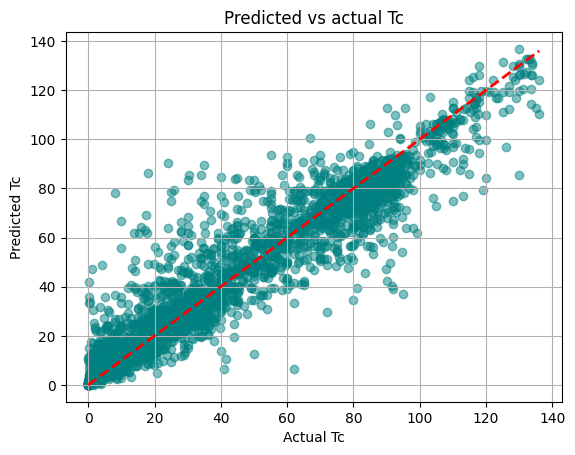

In [69]:

plt.figure()
plt.scatter(y_test_red,y_pred_Red,c='teal',alpha=0.5)
plt.plot([y_test_red.min(),y_test_red.max()],[y_test_red.min(),y_test_red.max()],'r--',lw=2)
plt.grid(True)
plt.xlabel("Actual Tc")
plt.ylabel("Predicted Tc")
plt.title("Predicted vs actual Tc")
plt.show()

In [70]:
from sklearn.metrics import r2_score,root_mean_squared_error
r2_red=r2_score(y_test_red,y_pred_Red)
print(r2_red)

0.9240493806442593


In [58]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_red=sc.fit_transform(x_train_red)
x_test_red=sc.transform(x_test_red)

x_train_pca_red=pca.fit_transform(x_train_red)
x_test_pca_red=pca.transform(x_test_red)

In [89]:
from sklearn.ensemble import RandomForestRegressor
rfrpredp=RandomForestRegressor(n_estimators=100,max_depth=30,max_features='sqrt',random_state=0)
rfrpredp.fit(x_train_pca_red,y_train_red.ravel())

,n_estimators,100
,criterion,'squared_error'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [90]:
y_pred_pca_red=rfrpredp.predict(x_test_pca_red)

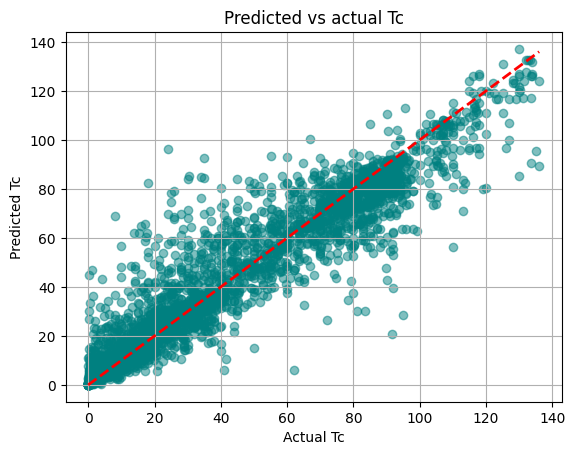

In [91]:

plt.figure()
plt.scatter(y_test_red,y_pred_pca_red,c='teal',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.grid(True)
plt.xlabel("Actual Tc")
plt.ylabel("Predicted Tc")   
plt.title("Predicted vs actual Tc")
plt.show()

In [92]:
from sklearn.metrics import r2_score,root_mean_squared_error
r2_red_pca=r2_score(y_test_red,y_pred_pca_red)
print(r2_red_pca)

0.9140858083041429


In [79]:
# Compute correlation matrix
corr_val = df.corr()

# Get correlation values (excluding self-correlation)
abs_val = corr_val['critical_temp'].drop('critical_temp')

# Sort by absolute correlation (least to most correlated)
sorted_corr = abs_val.abs().sort_values()

# Use the sorted index to get the actual correlation values (with signs)
least_correlated = abs_val.loc[sorted_corr.index]

# Print the sorted correlations (least correlated features first)
print(least_correlated.to_string())


gmean_fie                         -0.025103
entropy_ThermalConductivity        0.085862
mean_fie                           0.102268
mean_atomic_radius                 0.105273
wtd_gmean_ElectronAffinity        -0.107359
wtd_mean_ElectronAffinity          0.111516
mean_atomic_mass                  -0.113523
std_Density                        0.115243
wtd_entropy_ThermalConductivity   -0.116728
range_FusionHeat                  -0.140714
range_Valence                     -0.143546
gmean_atomic_radius               -0.143770
wtd_range_ElectronAffinity         0.185348
mean_ElectronAffinity             -0.193550
wtd_std_FusionHeat                -0.195571
std_FusionHeat                    -0.201310
wtd_std_Density                    0.207663
std_Valence                       -0.208072
gmean_atomic_mass                 -0.230345
wtd_entropy_ElectronAffinity       0.237648
range_Density                      0.260536
std_ElectronAffinity               0.262103
range_ElectronAffinity          

In [85]:
weak_corr=abs_val[abs_val.abs()<0.2].index.to_list()
print(len(weak_corr))

15
